In [1]:
import pyodbc
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conn=pyodbc.connect('Driver={SQL Server};'
                    'Server=localhost;'
                    'Database=MentalHealthDB;'
                    'Trusted_Connection=yes;')

query="SELECT * FROM MentalHealthDataset"
df=pd.read_sql(query, conn)
df=df.drop('User_ID', axis=1)
print(df)

      Age             Gender  Occupation    Country Mental_Health_Condition  \
0    36.0         Non-binary       Sales     Canada                      No   
1    34.0             Female   Education         UK                     Yes   
2    65.0         Non-binary       Sales        USA                     Yes   
3    34.0               Male       Other  Australia                      No   
4    22.0             Female  Healthcare     Canada                     Yes   
..    ...                ...         ...        ...                     ...   
995  46.0         Non-binary       Other    Germany                      No   
996  31.0               Male       Sales     Canada                      No   
997  33.0             Female          IT    Germany                      No   
998  42.0             Female     Finance  Australia                     Yes   
999  43.0  Prefer not to say       Sales    Germany                      No   

    Severity Consultation_History Stress_Level  Sle

C:\Users\jeffg\AppData\Local\Temp\ipykernel_23976\2134214505.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query, conn)



Shape:
(1000, 11)

Columns:
Index(['Age', 'Gender', 'Occupation', 'Country', 'Mental_Health_Condition',
       'Severity', 'Consultation_History', 'Stress_Level', 'Sleep_Hours',
       'Work_Hours', 'Physical_Activity_Hours'],
      dtype='object')

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   float64
 1   Gender                   1000 non-null   object 
 2   Occupation               1000 non-null   object 
 3   Country                  1000 non-null   object 
 4   Mental_Health_Condition  1000 non-null   object 
 5   Severity                 1000 non-null   object 
 6   Consultation_History     1000 non-null   object 
 7   Stress_Level             1000 non-null   object 
 8   Sleep_Hours              1000 non-null   float64
 9   Work_Hours               1000 non-null

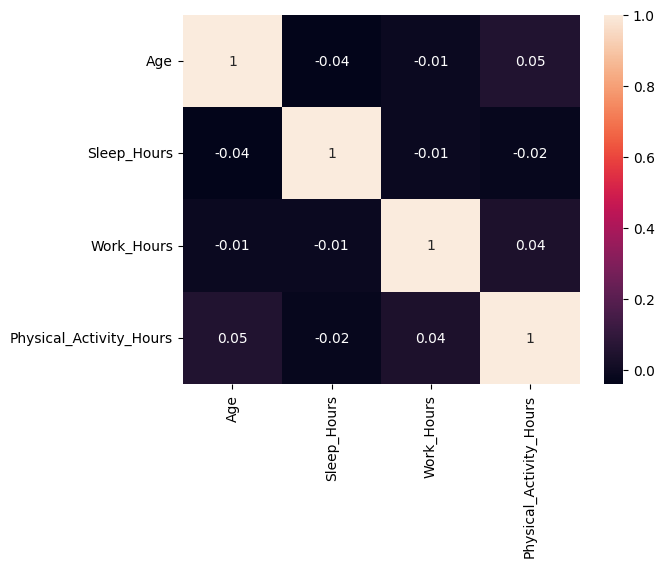

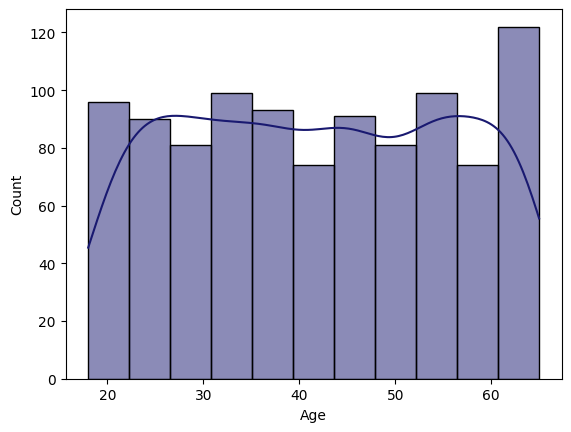

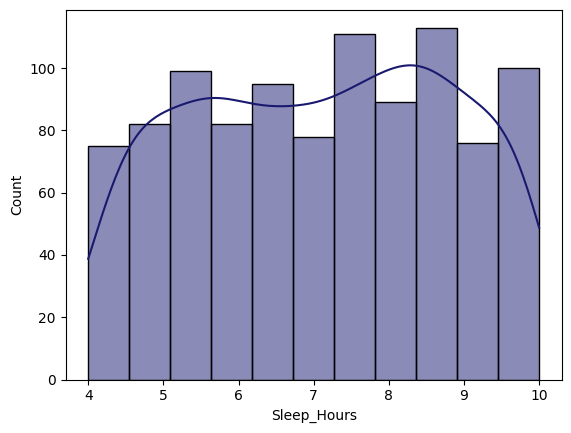

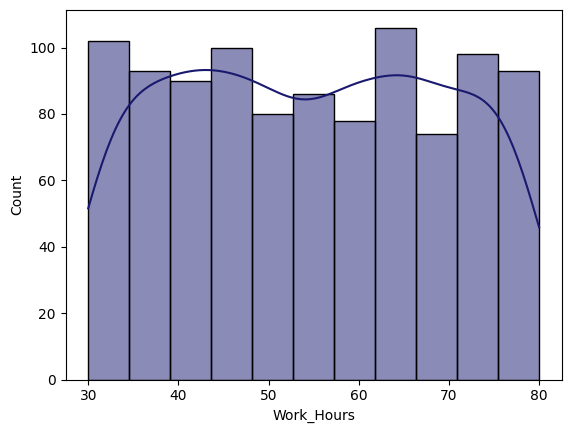

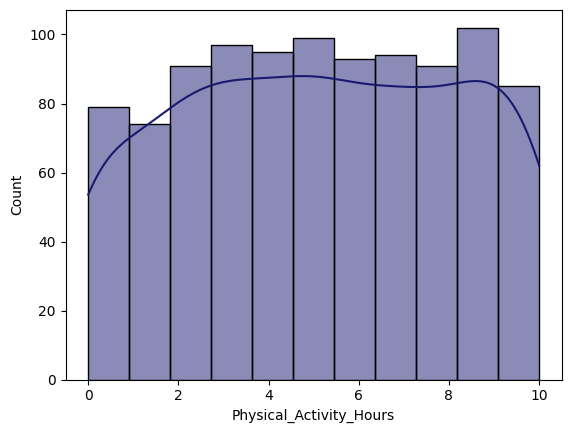

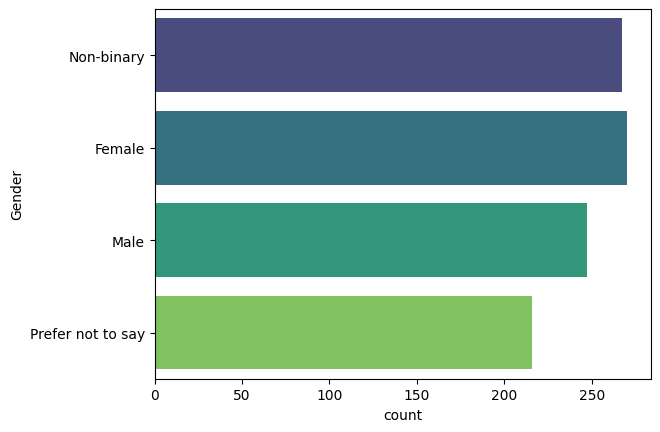

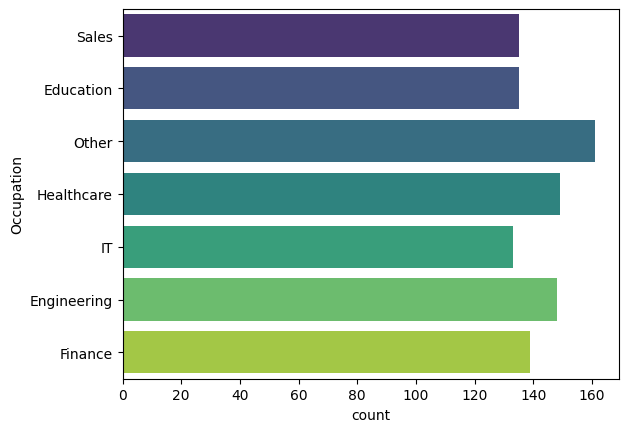

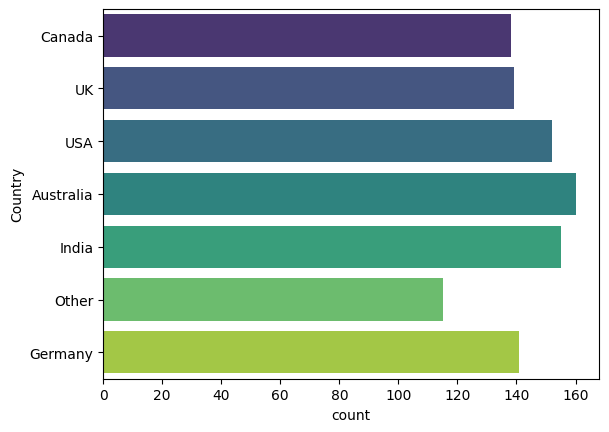

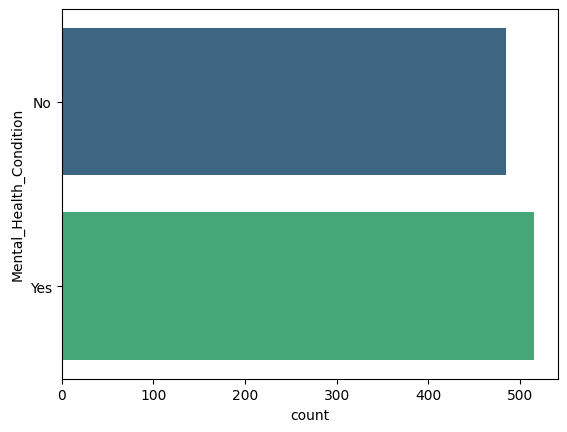

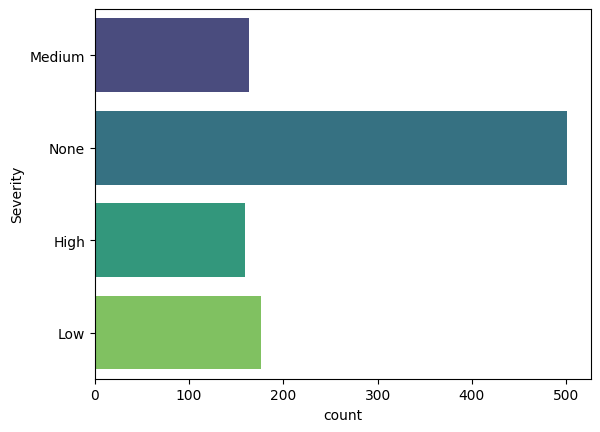

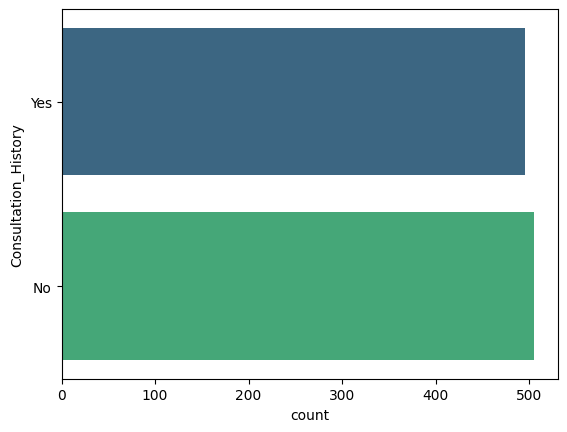

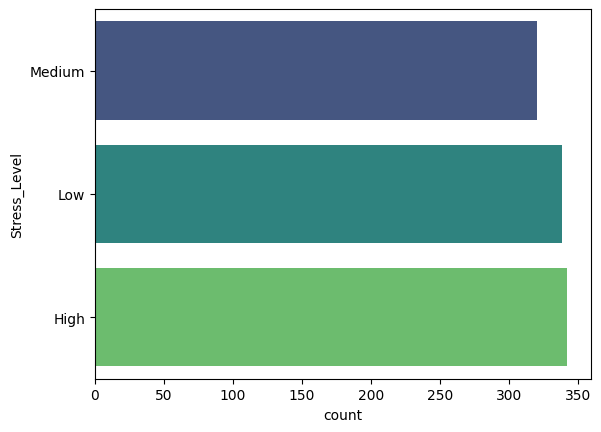

In [22]:

#X=df[['Age', 'Gender', 'Occupation',
#      'Country', 'Mental_Health_Condition', 'Severity', 'Consultation_History', 'Stress_Level']]
#Y=df['Work_Hours']
numeric=df[['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']]
categoric=df[['Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity', 'Consultation_History', 'Stress_Level']]

print("\nShape:")
print(df.shape)
print("\nColumns:")
print(df.columns)
print("\ninfo:")
print(df.info())
print("\nStatistical Description:")
print(df.describe())

print("\n")

# Unique values for non-numeric columns
for i in range(df.shape[1]):
      column=df.columns[i]
      if pd.api.types.is_object_dtype(df[column]):
            print(f'{df[column].value_counts()}\n')

#Correlation matrix for numeric columns
corr_matrix=df.corr(numeric_only=True).round(2)
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

#Distribution of numeric columns
for i in numeric:
      sns.histplot(df, x=i, kde=True, color="midnightblue")
      plt.show()
      #sns.boxplot(df, x=i, color="dodgerblue")
      #plt.show()


#Distribution of categoric columns
for j in categoric:
    sns.countplot(df, y=j, hue=j, palette="viridis")
    plt.show()

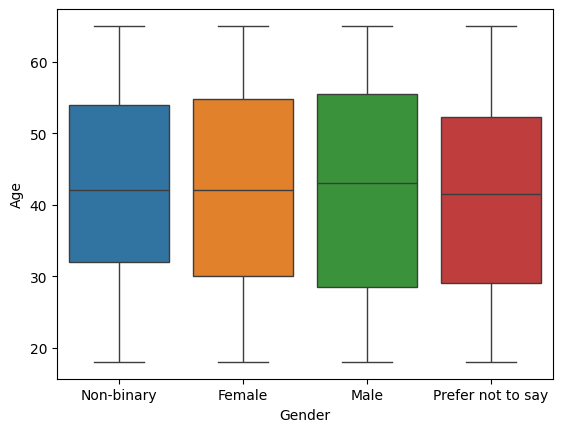

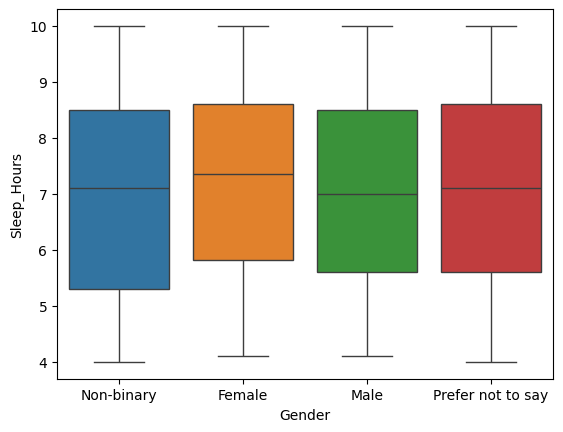

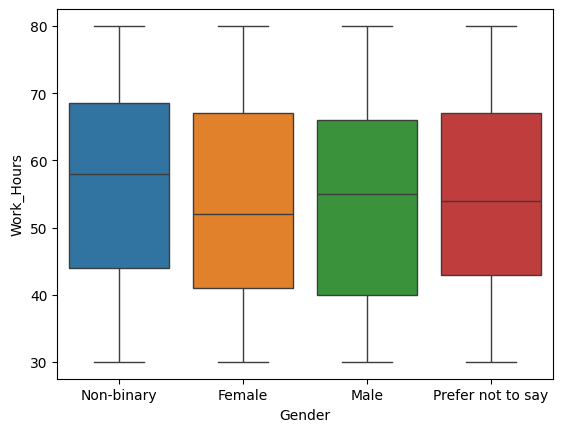

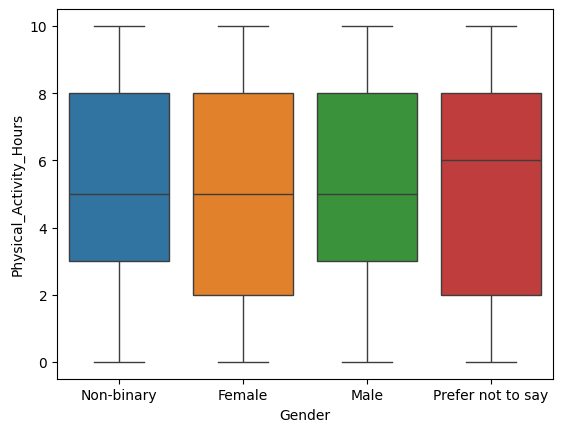

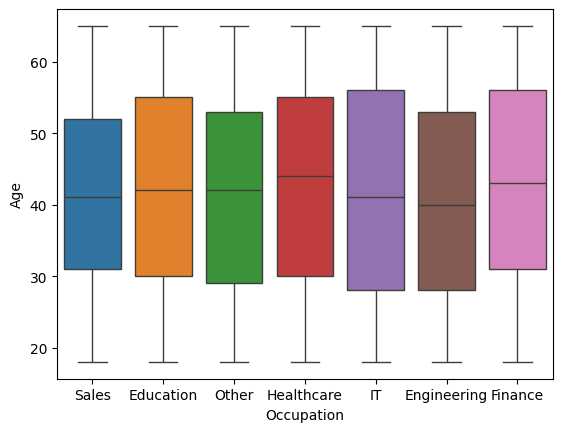

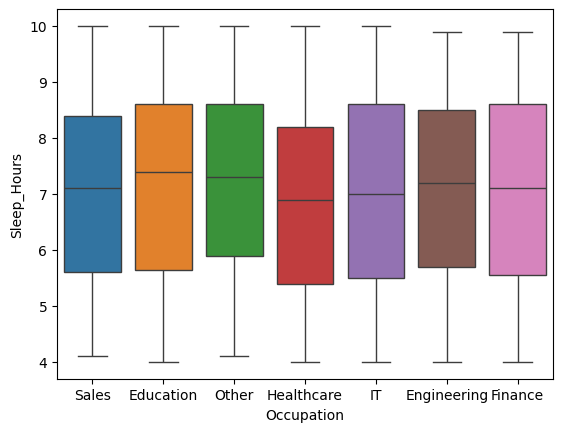

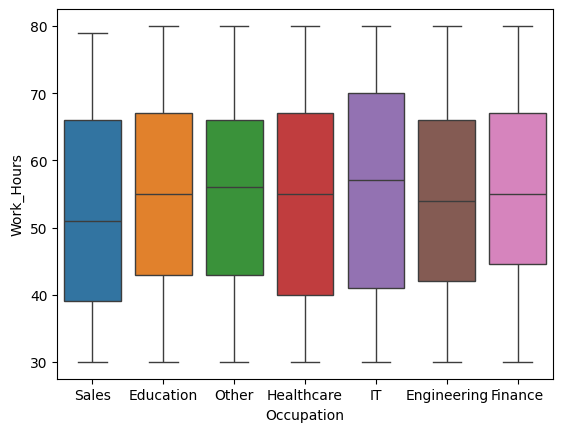

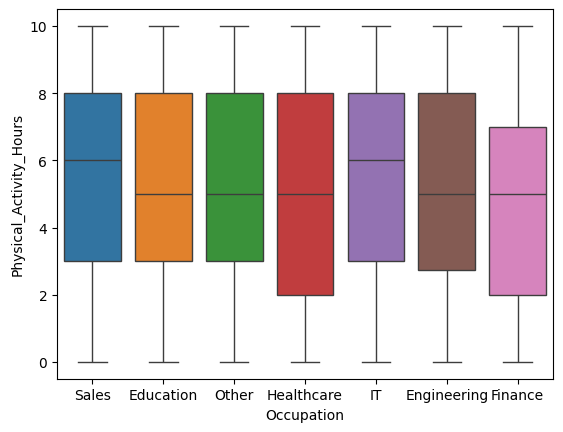

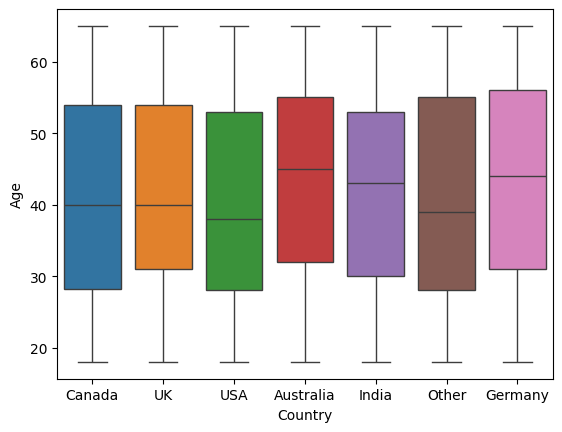

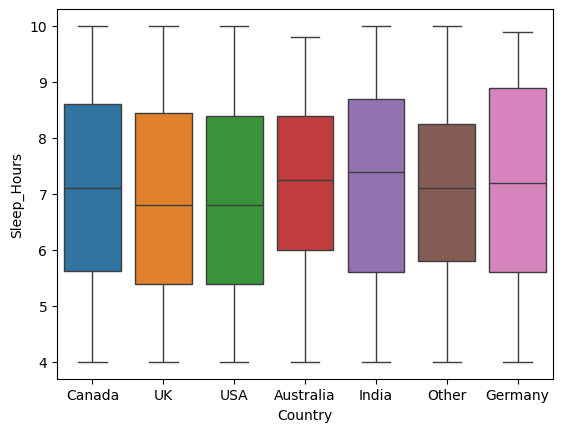

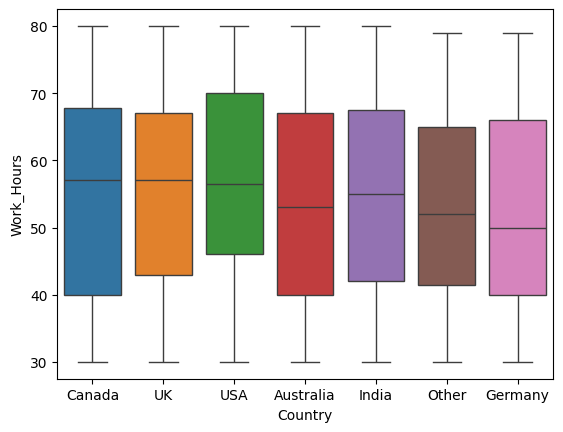

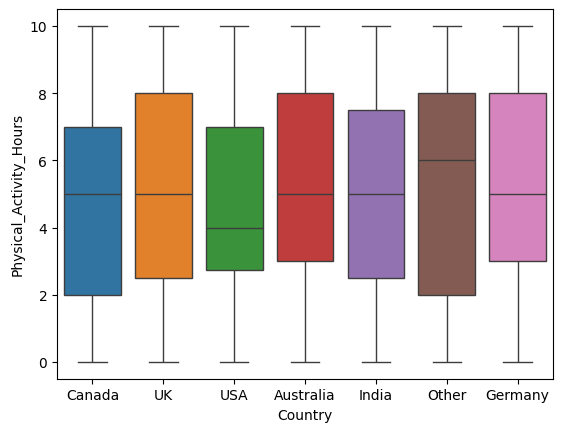

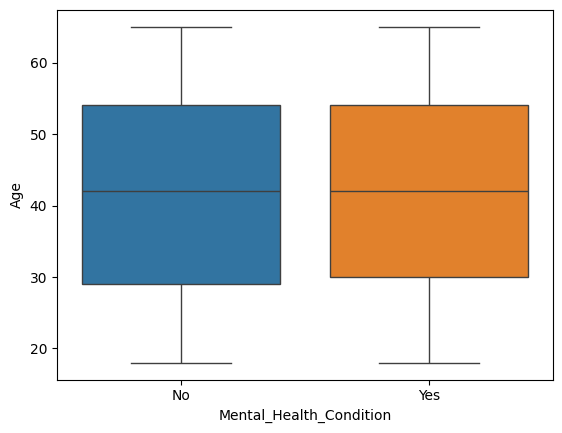

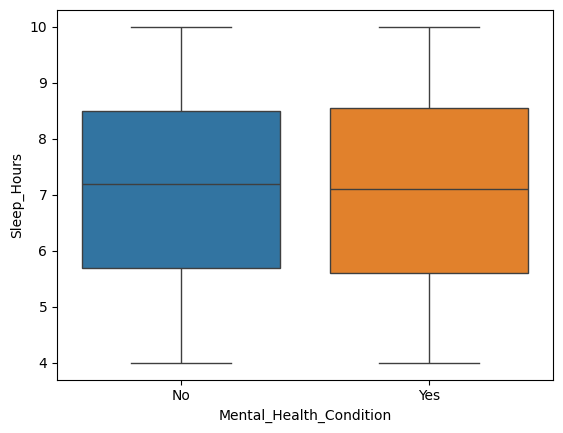

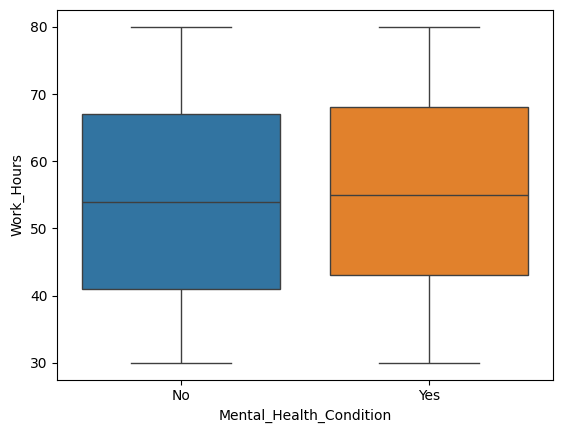

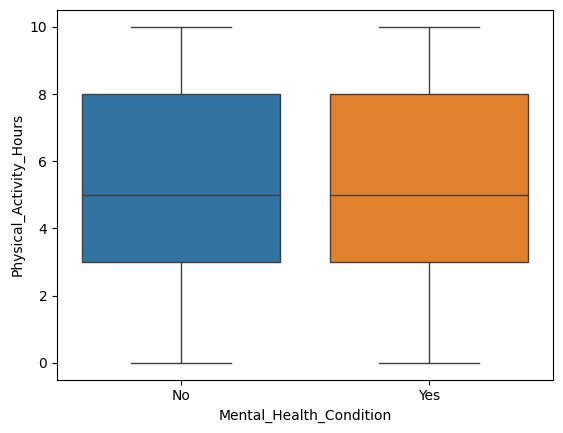

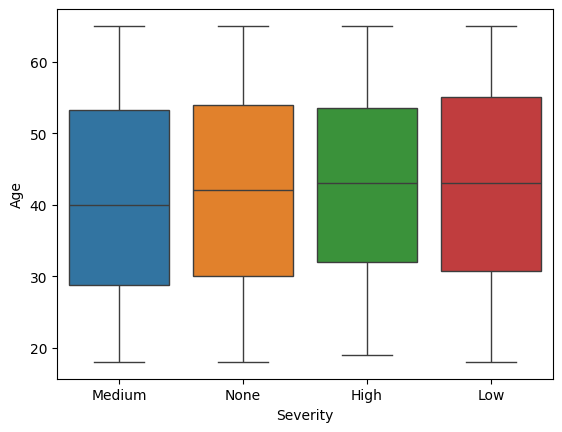

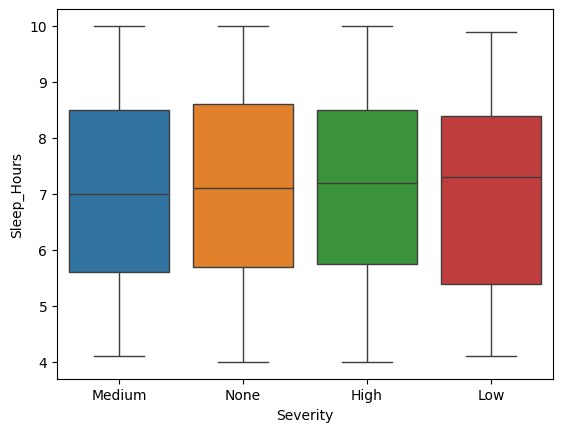

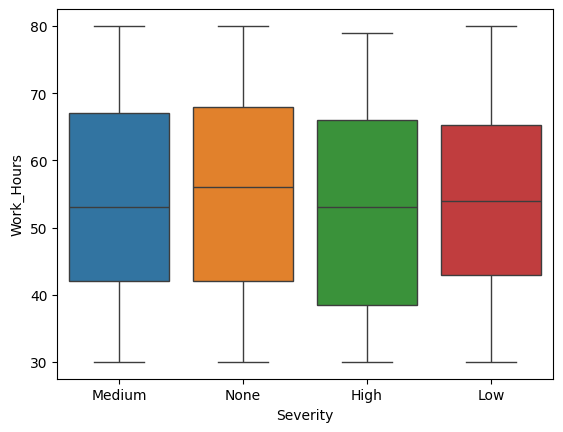

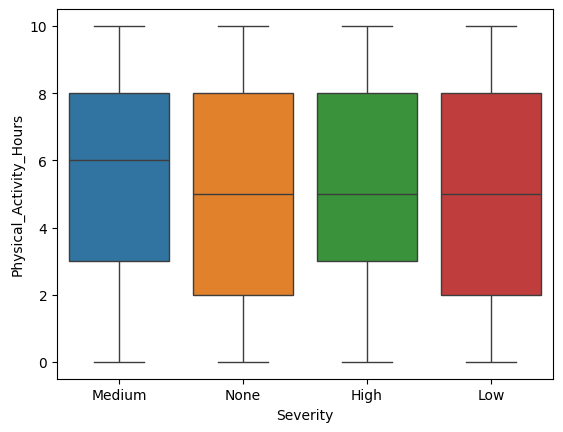

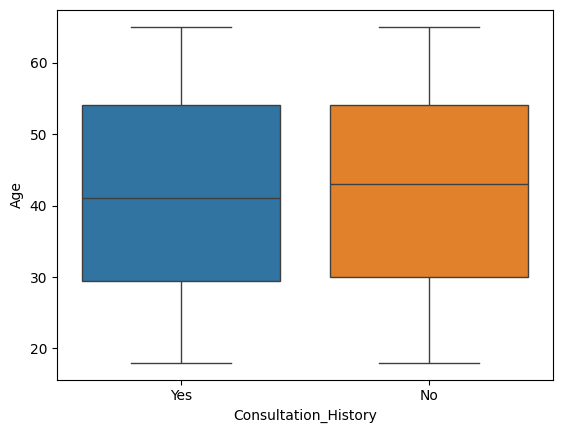

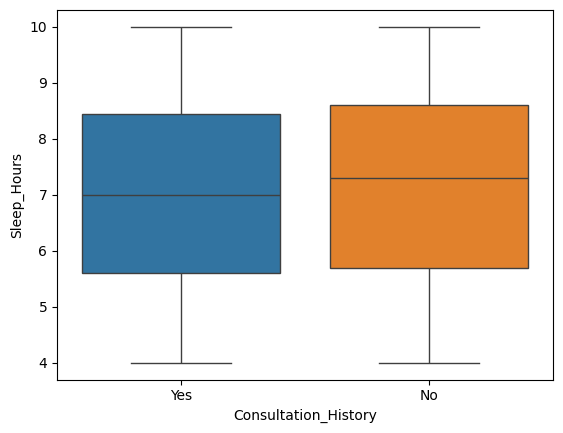

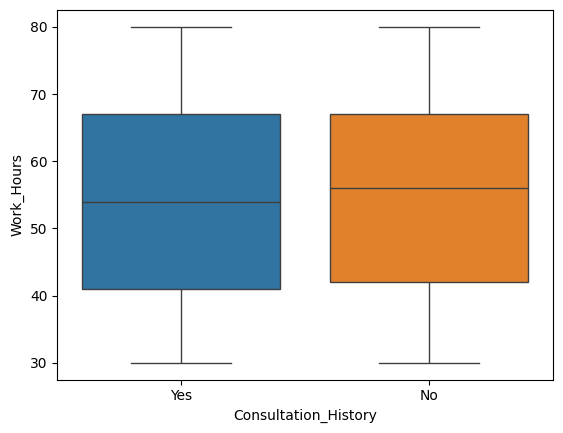

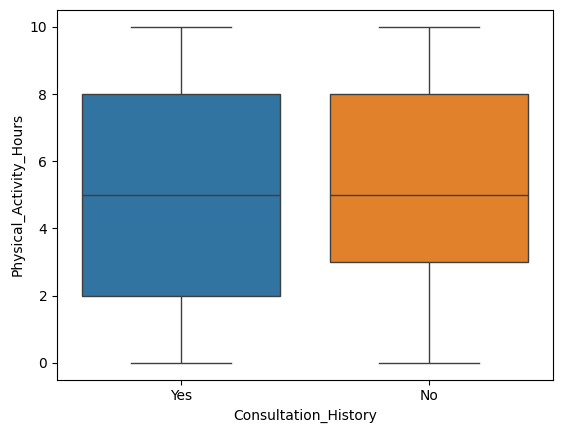

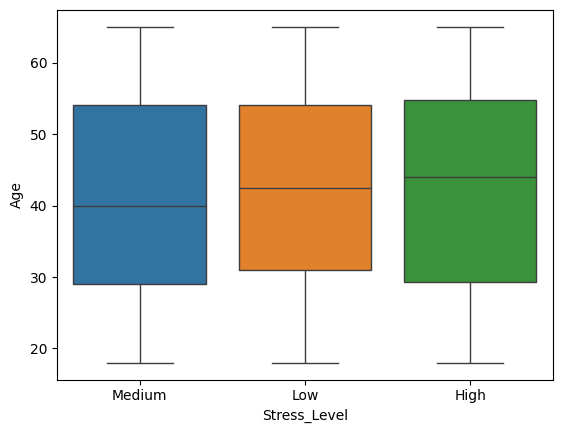

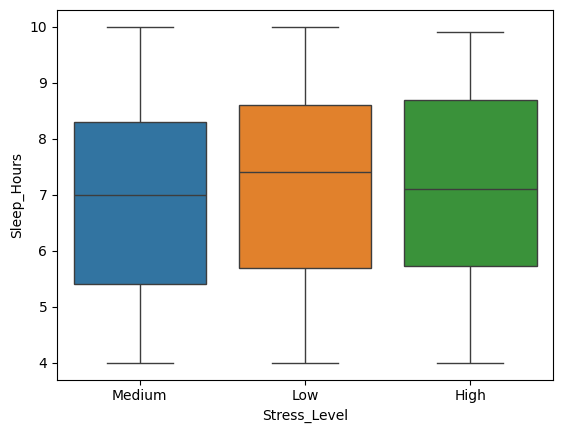

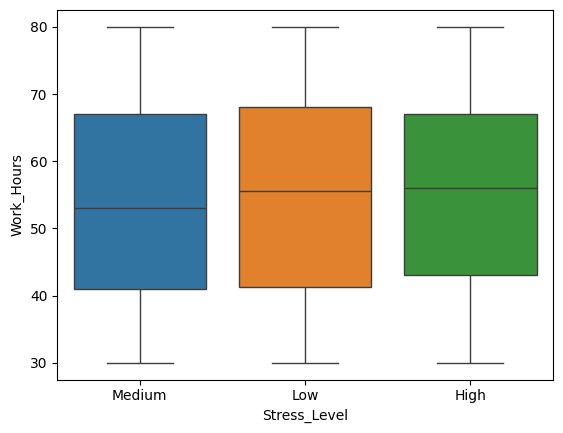

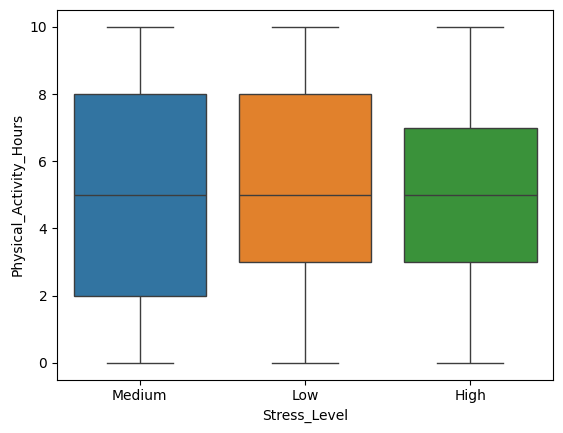

"\nfrom sklearn.preprocessing import LabelEncoder, StandardScaler\nfrom sklearn.impute import SimpleImputer\n\n#Preprocessing Steps\n#Handling categorical values\nlabel_encoders={}\nfor i in categoric:\n    label_encoders[i]=LabelEncoder()\n    df[i]=label_encoders[i].fit_transform(df[i].astype(str))\n\n#Impute missing values\nimputer=SimpleImputer(strategy='mean')\ndf_imputed=pd.DataFrame(imputer.fit_transform(df), columns=df.columns)\n\n#Normalize numerical features\nnumerical_columns=['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']\nscaler=StandardScaler()\ndf_imputed[numerical_columns]=scaler.fit_transform(df_imputed[numerical_columns])\n\nprint(df.head())\ndf_imputed.to_csv('preprocessed_mental_health_dataset,csv', index=False)\n"

In [23]:
#sns.scatterplot(df, x="Work_Hours", y="Sleep_Hours", hue="Stress_Level", style="Stress_Level")
#plt.show()

for i in categoric:
    for j in numeric:
        #sns.violinplot(hue=i, y=j, data=df)
        sns.boxplot(x=i, hue=i, y=j, data=df)
        plt.show()









"""
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

#Preprocessing Steps
#Handling categorical values
label_encoders={}
for i in categoric:
    label_encoders[i]=LabelEncoder()
    df[i]=label_encoders[i].fit_transform(df[i].astype(str))

#Impute missing values
imputer=SimpleImputer(strategy='mean')
df_imputed=pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

#Normalize numerical features
numerical_columns=['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']
scaler=StandardScaler()
df_imputed[numerical_columns]=scaler.fit_transform(df_imputed[numerical_columns])

print(df.head())
df_imputed.to_csv('preprocessed_mental_health_dataset,csv', index=False)
"""